# HELLO EVERYONE 
### The present pipeline is designed for amplicon/metagenome/metabarcoding analysis using the R package DADA2. This automated workflow is aimed to be useful for any metagenomic analysis using Illumina sequences.  

## DADA2: 
### Here we will use DADA2 as a starting point to process reads until generating a table of Amplicon Sequence Variants (ASV). 

### This workflow assumes that your sequencing data meets certain criteria:
    1)Samples have been demultiplexed
    2)Non-biological nucleotides have been removed (CUTADAPT step)

## The steps to follow from the pipeline to the ASV table are:
- Set the workspace
- Filter and Trim
- Dereplicate
- Learn Error Rates
- Infer sample composition
- Merge paired reads
- Remove chimeras
- Get sequence table
- Assign Taxonomy

### Setting up our workspace
    First we have to load the DADA2 package (library(dada2)), then generate random pseudonumbers (set.seed(100)). Next let's see where we are located on the server. Finally we will place ourselves in the directory where our reads are located. 

In [3]:
library(dada2) 
set.seed(100)
getwd()

Loading required package: Rcpp



[1] "C:/Users/51982/Desktop/23S_tesis"

In [22]:
path <- 'C:/Users/51982/Desktop/23S_tesis/Pantano23S/'

### Get matched lists of the forward and reverse fastq files

In [23]:
fnFs <- sort(list.files(path, pattern="R1.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="R2.fastq", full.names = TRUE))

### Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq

In [24]:
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

In [25]:
sample.names

[1] "BLANCO1" "BLANCO2" "PAN1A"   "PAN1B"   "PAN1C"   "PAN2A"   "PAN2B"  
 [8] "PAN2C"   "PAN3A"   "PAN3B"   "PAN3C"   "PAN4A"   "PAN4B"   "PAN4C"  
[15] "PAN5A"   "PAN5B"   "PAN5C"

### Specify the full path to the fnFs and fnRs:
THE FILTERED READS WILL BE PLACED IN THE DIRECTORY "FILTERED".

In [26]:
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))

### Let's visualize how you’re reads are doing:
    -DADA2 allows quality plotting of Forward and Reverse reads.

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


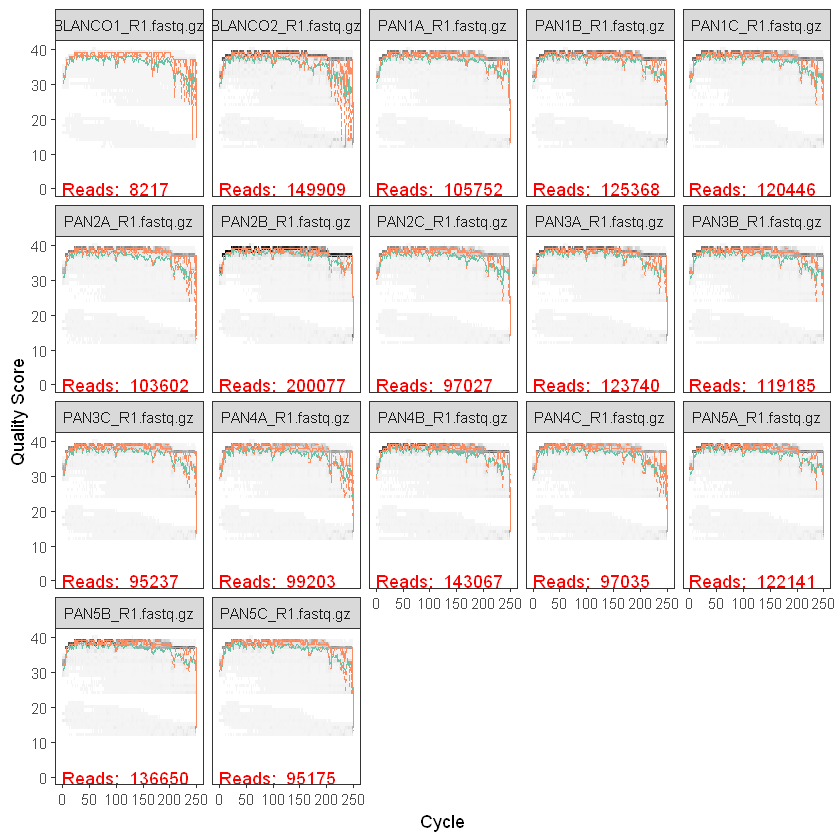

In [27]:
plotQualityProfile(fnFs)

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


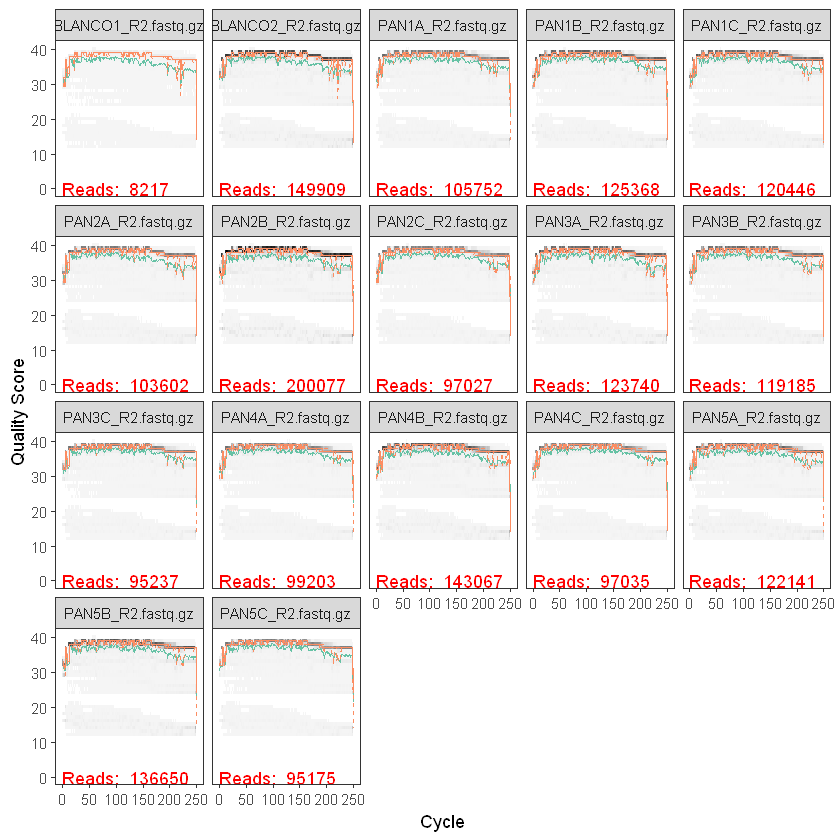

In [28]:
plotQualityProfile(fnRs)

## Filter and Trim the forward and reverse reads : 
We’ll use standard filtering parameters: maxN=0 (DADA2 requires no Ns), truncQ=2, rm.phix=TRUE and maxEE=2.
The maxEE parameter sets the maximum number of “expected errors” allowed in a read, which is a better filter than simply averaging quality scores.

TrimLeft is used for for remove adapters.

In [29]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, maxN=0, rm.phix=TRUE, maxEE = 2, compress=TRUE, multithread=TRUE)

Creating output directory: C:/Users/51982/Desktop/23S_tesis/Pantano23S//filtered

Multithreading has been DISABLED, as forking is not supported on .Platform$OS.type 'windows'



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


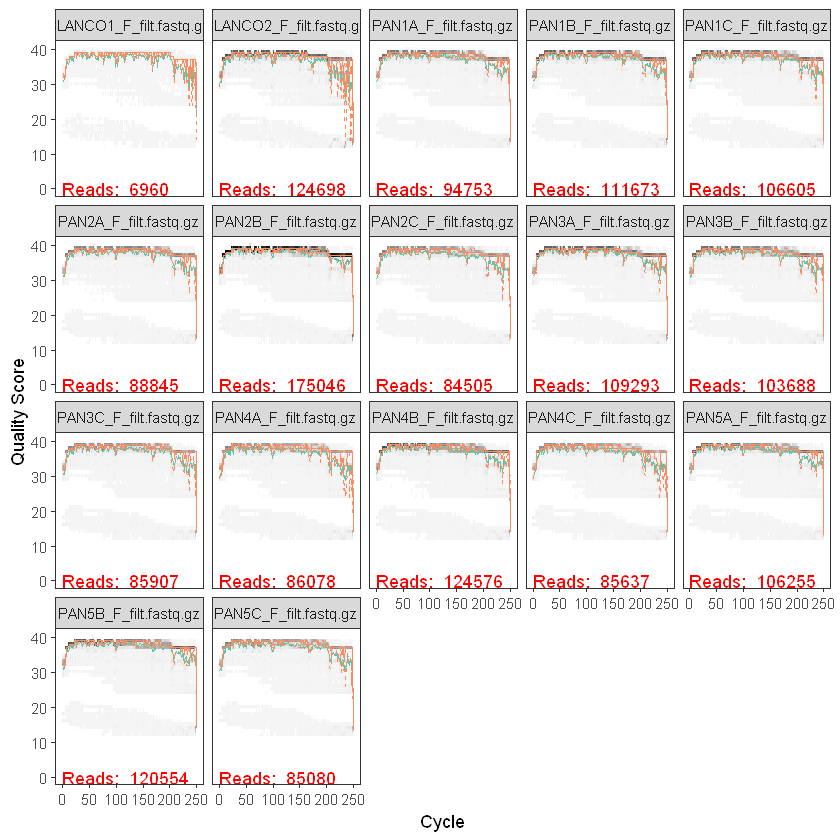

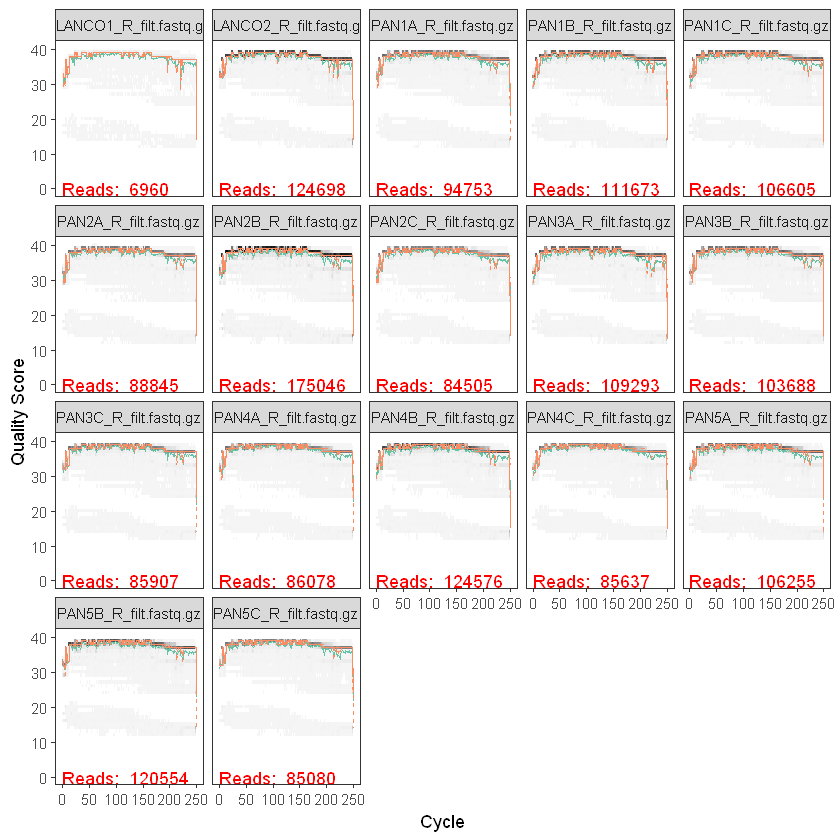

In [30]:
plotQualityProfile(filtFs)
plotQualityProfile(filtRs)

The function filterAndTrim () is capable to filter reverse and forward reads jointly. 

## Visualize the estimated error rates

In [31]:
errF <- learnErrors(filtFs, multithread = FALSE)
errR <- learnErrors(filtRs, multithread = FALSE)

111172250 total bases in 444689 reads from 5 samples will be used for learning the error rates.
111172250 total bases in 444689 reads from 5 samples will be used for learning the error rates.


## DADA, inferring ASVs: 
### Infer sample composition

In [32]:
dadaFs <- dada(filtFs, err=errF, multithread = TRUE)
dadaRs <- dada(filtRs, err=errR, multithread = TRUE)

Sample 1 - 6960 reads in 2175 unique sequences.
Sample 2 - 124698 reads in 26241 unique sequences.
Sample 3 - 94753 reads in 28832 unique sequences.
Sample 4 - 111673 reads in 34560 unique sequences.
Sample 5 - 106605 reads in 34652 unique sequences.
Sample 6 - 88845 reads in 24628 unique sequences.
Sample 7 - 175046 reads in 33508 unique sequences.
Sample 8 - 84505 reads in 25365 unique sequences.
Sample 9 - 109293 reads in 29379 unique sequences.
Sample 10 - 103688 reads in 31634 unique sequences.
Sample 11 - 85907 reads in 27174 unique sequences.
Sample 12 - 86078 reads in 34153 unique sequences.
Sample 13 - 124576 reads in 37857 unique sequences.
Sample 14 - 85637 reads in 31067 unique sequences.
Sample 15 - 106255 reads in 30796 unique sequences.
Sample 16 - 120554 reads in 30725 unique sequences.
Sample 17 - 85080 reads in 29654 unique sequences.
Sample 1 - 6960 reads in 1799 unique sequences.
Sample 2 - 124698 reads in 17019 unique sequences.
Sample 3 - 94753 reads in 27945 uniq

## Merge forward/reverse reads and get a sequence table
    -Using the function mergePairs() it's posible to merge forwards and revers reads 
    -With the function makeSequenceTable() we create a table of sequences.

6757 paired-reads (in 10 unique pairings) successfully merged out of 6818 (in 20 pairings) input.

30110 paired-reads (in 10 unique pairings) successfully merged out of 123920 (in 96 pairings) input.

61107 paired-reads (in 628 unique pairings) successfully merged out of 93146 (in 2610 pairings) input.

68088 paired-reads (in 742 unique pairings) successfully merged out of 110157 (in 3482 pairings) input.

56333 paired-reads (in 387 unique pairings) successfully merged out of 104964 (in 2307 pairings) input.

46199 paired-reads (in 115 unique pairings) successfully merged out of 87904 (in 547 pairings) input.

123897 paired-reads (in 108 unique pairings) successfully merged out of 174263 (in 532 pairings) input.

48556 paired-reads (in 376 unique pairings) successfully merged out of 83231 (in 1970 pairings) input.

49818 paired-reads (in 243 unique pairings) successfully merged out of 108438 (in 1417 pairings) input.

53462 paired-reads (in 372 unique pairings) successfully merged out 


 257  271  275  290  291  292  293  294  300  316  318  322  324  357  360  365 
   1    1    1    1    5   35    6    3    1    4    1    3    1    7    6    1 
 368  369  371  372  373  374  375  376  377  378  379  380  381  383  391  402 
   2    2    3    9    6 2446  426  477  123   15   10   19    4    2    1    1 
 410  454 
   1    1 

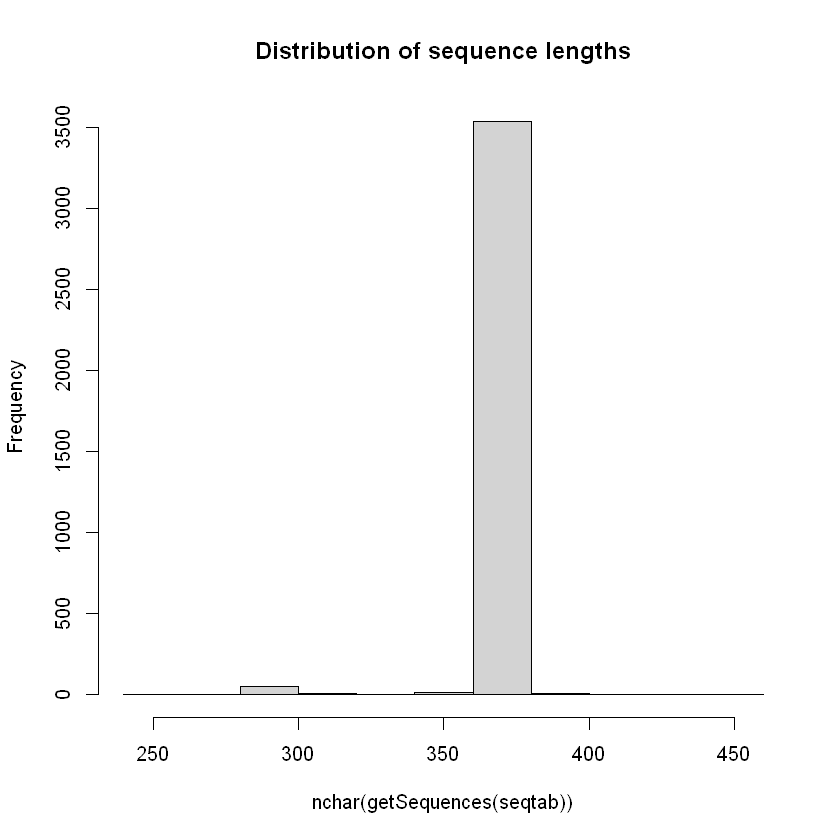

In [33]:
mergers <- mergePairs(dadaFs, filtFs, dadaRs, filtRs, verbose=TRUE)
seqtab <- makeSequenceTable(mergers)
table(nchar(getSequences(seqtab)))
hist(nchar(getSequences(seqtab)), main="Distribution of sequence lengths")


 357  360  365  368  369  371  372  373  374  375  376  377  378  379  380  381 
   7    6    1    2    2    3    9    6 2446  426  477  123   15   10   19    4 
 383  391 
   2    1 

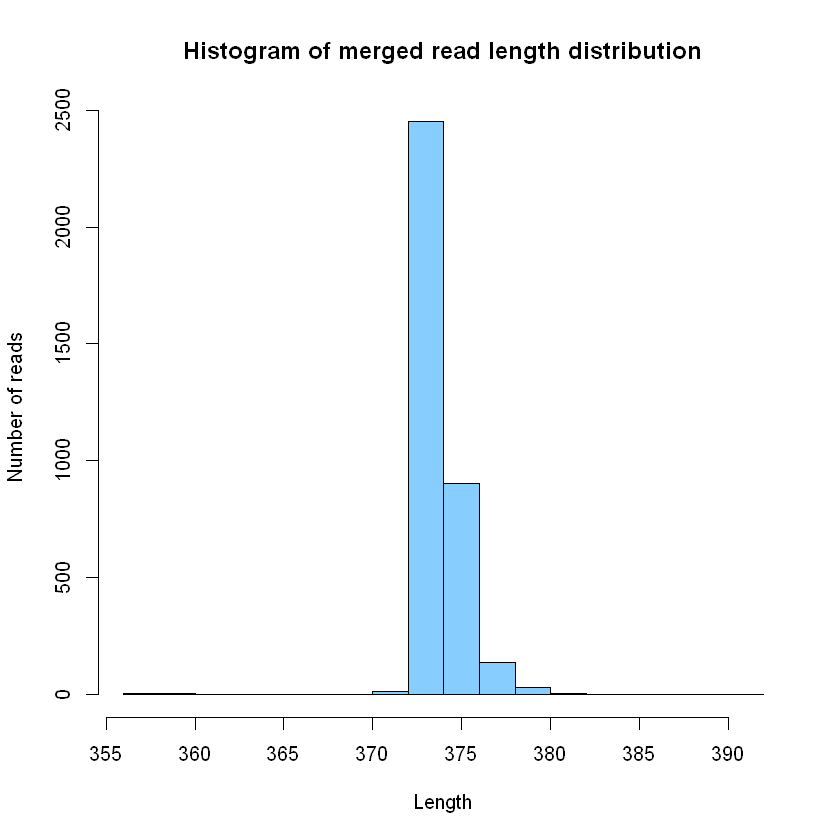

In [36]:
seqtab2 <- seqtab[,nchar(colnames(seqtab)) %in% 340:400]
table(nchar(getSequences(seqtab2)))
hist(nchar(getSequences(seqtab2)), main = "Histogram of merged read length distribution", xlab = "Length", ylab = "Number of reads", col = "skyblue1")

## Removing quimeras 
    -Using removeBimeraDenovo: Remove quimeric sequences 
    -sum() we identifie the percentage of quimeric sequences

In [37]:
seqtab.nochim <- removeBimeraDenovo(seqtab2, method="consensus", multithread=TRUE, verbose=TRUE)
sum(seqtab.nochim)/sum(seqtab2)

Identified 3237 bimeras out of 3559 input sequences.



[1] 0.7581392

In [38]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
View(track)
write.table(x = track, file = "reads-stats.txt", sep = "\t", quote = FALSE)

,input,filtered,denoisedF,denoisedR,merged,nonchim
BLANCO1,8217,6960,6828,6877,6757,6739
BLANCO2,149909,124698,124171,124315,30110,30107
PAN1A,105752,94753,94175,93593,61107,39869
PAN1B,125368,111673,110899,110777,68088,41552
PAN1C,120446,106605,105935,105510,56333,43099
PAN2A,103602,88845,88223,88104,46199,42681
PAN2B,200077,175046,174517,174665,123897,119501
PAN2C,97027,84505,83946,83655,48556,35516
PAN3A,123740,109293,108865,108801,49818,40006
PAN3B,119185,103688,102893,102783,53462,39778


## For save work space (checkpoint)

In [39]:
saveRDS(seqtab.nochim, "23sall.rds")
save.image("23s.RData")

In [1]:
load("23s.RData")

## Assingation of taxonomy 

In [4]:
taxSilva <- assignTaxonomy(seqtab.nochim, 'Silva_23S_train_microgeen.fasta', multithread=TRUE, minBoot = 80, tryRC=TRUE)

In [43]:
head(taxSilva)

,Kingdom,Phylum,Class,Order,Family,Genus
GGACAGAAAGACCCTATGAAGCTTGACTGTATCCTGAAATTGGGTTCGGGCTTTTCTTGCGCAGCCTAGGTGGGAGGCTATGAAGGTTCCCTTCCGGGGGGATCTGAGCCATCATTGAGAGACCACTCTGGGAAGGCTAGAATCCTAATGATGATCCCTGAATCGGGACATTTGACAGTTTCAGGTGGGCAGTTTATCTGGGGCGGATGCCTGCTAAAGCGTAACGGAGGCGTGCAAAGGTTCTCTCAGTCTGGACGGAAATCAGACATTTGAGTGTAAAGGCAAAAGAGAGCTTGACTGTAAGACCAACAAGTCGAGCAGGGGCGAAAGCCGGCCTTAGTGATCCGACGGTTTCCGAGTGGAAAGGCCGTCACTCA,Plantae,Chlorophyta,Chlorophyceae,Chlamydomonadales,Chlamydomonadaceae,Dangeardinia
GGACAGAAAGACCCTATGAAGCTTTACTGTATCTTGGAATTGGGTTTGGGCTTTGCTTGCGCAGGATAGGTGGGAGGCTTTGAAGATATTCTTGCGGGGATATTGGAGCCACTGGTGAGATACCACTCTAGTAAGGCTAAAATTCTAACTTCGAACCGTTATCCGGTCGAAGAACAGTTTCAGGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGTGCAAAGGTTCCCTCAGGCTGGTCGGACATCAGTCGTAGAGTGTAAAGGCATAAGGGAGCTTGACTGCGAGACCTACAAGTCGAGCAGAGACGAAAGTCGGCCTTAGTGATCCGACGGTTCCAAGTGGAAAGGCCGTCACTCA,Chromista,Cryptophyta,Cryptophyceae,NA,NA,NA
GGACAGAAAGACCCTATGAAGCTTTACTGTAGCTTGGTATTGTGCTCGGGCTCGGAATGCGCAGGATAGGTGGGAGGCTTTGATCCATTGCTTGCGGGTGATGGTGAGCCACTGGTGAGATACCACTCTTTTCGAGCTTAAGTTCTAACCCTCGCCCGTTATCCGGGGAGGGGACAGTATCAGGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGCGCAAAGGTCTGCTCAGGCTGGTTGGAAATCAGCCGACGAGTGTAAAAGCAGAAGCAGGCTTGACTGTGAGACCTACAAGTCGAACAGGGAGGAAACTCGGCTTTAGTGATCCGACGGTTCTGAGTGGAAAGGCCGTCACTCA,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium
GGACAGAAAGACCCTATGAAGCTTTACTGTAACTTGAGATTGAAATTGGACTTTATTTGCGCAGTATAGGTGGGAGGTGTTGATTATAATCTTGCGGGATTGTTGGAGCCATCAGTGAGATACCACTCTTGTAATGTTAGATTTCTAACTTTGAATCATGATCTGGTCAAAGAACAGTTTCAGGCGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAACGGTAACGGAGGCGTACAAAGGTTTCCTCTGAACGGGTAGAAATCGTATCTAGAGTGTAAAGGCATAAGGAAGCTTGACTGTGAGACCTACAAGTCGAGCAGGGACGAAAGTCGGTCTTAGTGATCTGACGGTACTGAGTGGAAAGGCCGTCACTCA,Chromista,Bacillariophyta,Mediophyceae,Stephanodiscales,Stephanodiscaceae,Cyclotella
GGACAGAAAGACCCTATGAAGCTTTACTGTATCTTGGAATTGGGTTTGGTCTTTACTTGCGCAGGATAGGTGGGAGGCAATGAAAATGTTCTTGCGGGAACATTCGAGCCAACGGTGAGATACCACTCTAGTAAAGATAAAATTCTAACTCTATACCGTAAGCCGGATAGAGAACAGTTTCAAGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGTGCAAAGGTTCCCTCAGGCTGGTTGGACATCAGTCGAAGAGTGTAAAGGCATAAGGGAGCTTGACTGCGAGACCCACAAGTCGAGCAGAGACGAAAGTCGGCCTTAGTGATCCGACGGTTCCGAGTGGAAAGGCCGTCACTCA,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia
GGACAGAAAGACCCTATGAAGCTTTACTGTAGCTTGGTATTGTGCCCGGGCTCTGAATGCGCAGGATAGGTGGGAGGCTTTGATCCAATGCTTGCGGGTGTTGGTGAGCCACTGGTGAGATACCACTCTTTCAGAGCTAGGGTTCTAACGGTCACCCGTTATCCGGGGACCGGACAGTATCTGGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGCGCAAAGGTCTGCTCAGGCTGGTTGGAAATCAGCCGACGAGTGTAAAAGCAGAAGCAGGCTTGACTGTGAGACCTACAAGTCGAACAGGGAGGAAACTCGGCTTTAGTGATCCGACGGTTCTGAGTGGAAAGGCCGTCACTCA,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium


In [5]:
speciesSilva <- addSpecies(taxSilva, 'Silva_23S_assigment.fasta', tryRC = TRUE, n = 10000)

In [45]:
speciesSilva

,Kingdom,Phylum,Class,Order,Family,Genus,Species
GGACAGAAAGACCCTATGAAGCTTGACTGTATCCTGAAATTGGGTTCGGGCTTTTCTTGCGCAGCCTAGGTGGGAGGCTATGAAGGTTCCCTTCCGGGGGGATCTGAGCCATCATTGAGAGACCACTCTGGGAAGGCTAGAATCCTAATGATGATCCCTGAATCGGGACATTTGACAGTTTCAGGTGGGCAGTTTATCTGGGGCGGATGCCTGCTAAAGCGTAACGGAGGCGTGCAAAGGTTCTCTCAGTCTGGACGGAAATCAGACATTTGAGTGTAAAGGCAAAAGAGAGCTTGACTGTAAGACCAACAAGTCGAGCAGGGGCGAAAGCCGGCCTTAGTGATCCGACGGTTTCCGAGTGGAAAGGCCGTCACTCA,Plantae,Chlorophyta,Chlorophyceae,Chlamydomonadales,Chlamydomonadaceae,Dangeardinia,NA
GGACAGAAAGACCCTATGAAGCTTTACTGTATCTTGGAATTGGGTTTGGGCTTTGCTTGCGCAGGATAGGTGGGAGGCTTTGAAGATATTCTTGCGGGGATATTGGAGCCACTGGTGAGATACCACTCTAGTAAGGCTAAAATTCTAACTTCGAACCGTTATCCGGTCGAAGAACAGTTTCAGGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGTGCAAAGGTTCCCTCAGGCTGGTCGGACATCAGTCGTAGAGTGTAAAGGCATAAGGGAGCTTGACTGCGAGACCTACAAGTCGAGCAGAGACGAAAGTCGGCCTTAGTGATCCGACGGTTCCAAGTGGAAAGGCCGTCACTCA,Chromista,Cryptophyta,Cryptophyceae,NA,NA,NA,NA
GGACAGAAAGACCCTATGAAGCTTTACTGTAGCTTGGTATTGTGCTCGGGCTCGGAATGCGCAGGATAGGTGGGAGGCTTTGATCCATTGCTTGCGGGTGATGGTGAGCCACTGGTGAGATACCACTCTTTTCGAGCTTAAGTTCTAACCCTCGCCCGTTATCCGGGGAGGGGACAGTATCAGGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGCGCAAAGGTCTGCTCAGGCTGGTTGGAAATCAGCCGACGAGTGTAAAAGCAGAAGCAGGCTTGACTGTGAGACCTACAAGTCGAACAGGGAGGAAACTCGGCTTTAGTGATCCGACGGTTCTGAGTGGAAAGGCCGTCACTCA,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium,NA
GGACAGAAAGACCCTATGAAGCTTTACTGTAACTTGAGATTGAAATTGGACTTTATTTGCGCAGTATAGGTGGGAGGTGTTGATTATAATCTTGCGGGATTGTTGGAGCCATCAGTGAGATACCACTCTTGTAATGTTAGATTTCTAACTTTGAATCATGATCTGGTCAAAGAACAGTTTCAGGCGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAACGGTAACGGAGGCGTACAAAGGTTTCCTCTGAACGGGTAGAAATCGTATCTAGAGTGTAAAGGCATAAGGAAGCTTGACTGTGAGACCTACAAGTCGAGCAGGGACGAAAGTCGGTCTTAGTGATCTGACGGTACTGAGTGGAAAGGCCGTCACTCA,Chromista,Bacillariophyta,Mediophyceae,Stephanodiscales,Stephanodiscaceae,Cyclotella,NA
GGACAGAAAGACCCTATGAAGCTTTACTGTATCTTGGAATTGGGTTTGGTCTTTACTTGCGCAGGATAGGTGGGAGGCAATGAAAATGTTCTTGCGGGAACATTCGAGCCAACGGTGAGATACCACTCTAGTAAAGATAAAATTCTAACTCTATACCGTAAGCCGGATAGAGAACAGTTTCAAGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGTGCAAAGGTTCCCTCAGGCTGGTTGGACATCAGTCGAAGAGTGTAAAGGCATAAGGGAGCTTGACTGCGAGACCCACAAGTCGAGCAGAGACGAAAGTCGGCCTTAGTGATCCGACGGTTCCGAGTGGAAAGGCCGTCACTCA,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia,NA
GGACAGAAAGACCCTATGAAGCTTTACTGTAGCTTGGTATTGTGCCCGGGCTCTGAATGCGCAGGATAGGTGGGAGGCTTTGATCCAATGCTTGCGGGTGTTGGTGAGCCACTGGTGAGATACCACTCTTTCAGAGCTAGGGTTCTAACGGTCACCCGTTATCCGGGGACCGGACAGTATCTGGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGCGCAAAGGTCTGCTCAGGCTGGTTGGAAATCAGCCGACGAGTGTAAAAGCAGAAGCAGGCTTGACTGTGAGACCTACAAGTCGAACAGGGAGGAAACTCGGCTTTAGTGATCCGACGGTTCTGAGTGGAAAGGCCGTCACTCA,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium,NA
GGACAGAAAGACCCTATGAAGCTTTACTGTAACTTGAAATTGGTTTTGGGCTTTTCTTGCGCAGCATAGGTGGGAGGCAATGATCTTATTTTTCGGAAGAAAGTGAGCCACAATGTGAGATACCACTCTGGAAAAGTTAGAAATCTAATAGTATTTTTTAATCAAGATGCTTGACAGTTTCAGGCGGGCAGTTTTACTGGGGCGGTAGCCTCCTAAAAAGTAACGGAGGCGTACAAAGGTTTTCTCAGTCTGGACGGAAATTAGTTGGAGAGTGTAAAGACATAAGAAAGCTTGACTGTGAGACCTATAAGTCGAACAGAGACTAAAGTCGGTCTTAGTGACCCGACGGTGCTGAGTGGAAAGGCCGTCACTCA,Protozoa,Euglenozoa,Euglenophyceae,Euglenales_[=Euglenida],Euglenaceae,Euglena,NA
GGACAGAAAGACCCTATGAAGCTTTACTGTAGCTTGGTATTGTGCTCGGGCTCGGAATGCGCAGGATAGGTGGGAGGCTTTGATCCATTGCTTGTGGGTGATGGTGAGCCACTGGTGAGATACCACTCTTTTCGAGCTTAAGTTCTAACCCTTACCCGTTATCCGGGGAGGGGACAGTATCAGGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGCGCAAAGGTTCCCTCAGGCTGGTTGGAAATCAGCCGACGAGTGTAAAGGCAGAAGGGAGCTTGACTGTGAGACCTACAAGTCGAACAGGGACGAAAGTCGGCCTTAGTGATCCGACGGTTCTGAGTGGAAAGGCCGTCACTCA,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium,NA
GGACAGAAAGACCCTATGAAGCTTTACTGTATCTTGGAATTGGGTTTGGTCTTTACTTGCGCAGGATAGGTGGGAGGCAGTGAAAATAGTCTTGCGGGACTATTAGAGCCAACGGTGAGATACCACTCTAGTAAAGATAAAATTCTAACTCTATACCGTTATCCGGATAGAGAACAGTTTCAAGTGGGCAGTTTGACTGGGGCGGTCGCCTCCTAAAAGGTAACGGAGGCGTGCAAAGGTTCCCTCAGGCTGGTTGGACATCAGTCGAAGAGTGTAAAGGCATAAGGGAGCTTGACTGCGAGACCCACAA

## Creating a taxa table: 
    -It's a table containing taxonomy information: "Kingdom", "Phylum", "Class", "Order", "Family", "Genus"

In [46]:
write.table(taxSilva, file = "taxSilva.tsv", sep = "\t")
write.table(speciesSilva, file = "speciesSilva.tsv", sep = "\t")

## Creating main files 

## Identify ASV number: (I got 1459 ASVs):
    Each ASV correspond to a taxonomic clasification
    '>ASV_1''>ASV_2''>ASV_3''>ASV_4''>ASV_5''>ASV_6 ... '>ASV_1459'
### For example: 
    ASV Kingdom Phylum Class Order Family Genus
    ASV_1 Bacteria Cyanobacteria Cyanobacteriia Synechococcales Cyanobiaceae Cyanobium_PCC-6307
    

In [8]:
asv_seqs <- colnames(seqtab.nochim)
asv_headers <- vector(dim(seqtab.nochim)[2], mode="character")
for (i in 1:dim(seqtab.nochim)[2]) {
  asv_headers[i] <- paste(">ASV", i, sep="_")
}

### TAXONOMY TABLE (tax table / asv_tax)

In [9]:
asv_tax <- taxSilva
row.names(asv_tax) <- sub(">", "", asv_headers)
write.table(asv_tax, "ASVs_taxonomy.nov.tsv", sep="\t", quote=F, col.names=NA)

### TAXONOMY TABLE FOR SPECIES (tax table species / asv_tax_sp)

In [10]:
asv_tax_sp <- speciesSilva
row.names(asv_tax_sp) <- sub(">", "", asv_headers)
write.table(asv_tax_sp, "ASVs_taxonomy_sp.nov.tsv", sep="\t", quote=F, col.names=NA)

### FULL SEQUENCES: will bind asv numbers and sequences
    This is going to bind the headers of ASVs and sequeces of ASVs

In [11]:
asv_fasta <- c(rbind(asv_headers, asv_seqs))
write(asv_fasta, "ASVs.nov.fa")

### Count table named: asv_tab
     Here we'll a count table containing the counts of ASVs

In [12]:
asv_tab <- t(seqtab.nochim)
row.names(asv_tab) <- sub(">", "", asv_headers)
write.table(asv_tab, "ASVs_counts.nov.tsv", sep="\t", quote=F, col.names=NA)

In [13]:
head(asv_tab,n=20L)

,BLANCO1_F_filt.fastq.gz,BLANCO2_F_filt.fastq.gz,PAN1A_F_filt.fastq.gz,PAN1B_F_filt.fastq.gz,PAN1C_F_filt.fastq.gz,PAN2A_F_filt.fastq.gz,PAN2B_F_filt.fastq.gz,PAN2C_F_filt.fastq.gz,PAN3A_F_filt.fastq.gz,PAN3B_F_filt.fastq.gz,PAN3C_F_filt.fastq.gz,PAN4A_F_filt.fastq.gz,PAN4B_F_filt.fastq.gz,PAN4C_F_filt.fastq.gz,PAN5A_F_filt.fastq.gz,PAN5B_F_filt.fastq.gz,PAN5C_F_filt.fastq.gz
ASV_1,9,0,9912,5051,9140,11,12009,13209,1083,13954,6212,16854,31478,17701,23002,23218,9027
ASV_2,0,18,11771,14131,1106,15971,34263,4346,653,779,11353,1033,1262,733,10192,12179,7652
ASV_3,0,0,867,949,5457,4702,4363,5311,17449,6955,411,799,1078,646,1461,990,620
ASV_4,0,0,133,174,1336,0,22058,157,0,82,173,3371,817,2934,442,900,1399
ASV_5,0,0,1378,2526,498,674,20328,158,0,385,2439,759,830,388,939,1171,1190
ASV_6,0,28294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_7,0,0,6192,5079,168,0,0,4765,0,44,3061,88,541,692,2340,1623,2425
ASV_8,0,0,158,177,4800,0,0,457,3141,3327,186,594,3280,2628,819,465,210
ASV_9,0,0,789,1481,188,3934,7535,106,0,287,1314,579,543,205,590,683,606
ASV_10,0,0,1516,2495,280,2467,0,126,1004,551,2465,880,908,414,995,1197,1258


# decontamination with package 

In [81]:
library(decontam)

In [82]:
colnames(asv_tab)

[1] "BLANCO1_F_filt.fastq.gz" "BLANCO2_F_filt.fastq.gz"
 [3] "PAN1A_F_filt.fastq.gz"   "PAN1B_F_filt.fastq.gz"  
 [5] "PAN1C_F_filt.fastq.gz"   "PAN2A_F_filt.fastq.gz"  
 [7] "PAN2B_F_filt.fastq.gz"   "PAN2C_F_filt.fastq.gz"  
 [9] "PAN3A_F_filt.fastq.gz"   "PAN3B_F_filt.fastq.gz"  
[11] "PAN3C_F_filt.fastq.gz"   "PAN4A_F_filt.fastq.gz"  
[13] "PAN4B_F_filt.fastq.gz"   "PAN4C_F_filt.fastq.gz"  
[15] "PAN5A_F_filt.fastq.gz"   "PAN5B_F_filt.fastq.gz"  
[17] "PAN5C_F_filt.fastq.gz"

In [114]:
vector_for_decontam <- c(rep(FALSE, 2), rep(TRUE, 15))

In [121]:
contam_df <- isContaminant(t(asv_tab), neg=vector_for_decontam, method='prevalence')

In [124]:
contam_df

,freq,prev,p.freq,p.prev,p,contaminant
,<dbl>,<int>,<lgl>,<dbl>,<dbl>,<lgl>
ASV_1,0.244914674,16,NA,0.058823529,0.058823529,TRUE
ASV_2,0.149551958,16,NA,0.058823529,0.058823529,TRUE
ASV_3,0.071190469,15,NA,0.003676471,0.003676471,TRUE
ASV_4,0.027525834,13,NA,0.022058824,0.022058824,TRUE
ASV_5,0.029186980,14,NA,0.011029412,0.011029412,TRUE
ASV_6,0.055281262,1,NA,NA,NA,FALSE
ASV_7,0.040213772,12,NA,0.036764706,0.036764706,TRUE
ASV_8,0.027424503,13,NA,0.022058824,0.022058824,TRUE
ASV_9,0.019671042,14,NA,0.011029412,0.011029412,TRUE


In [117]:
table(contam_df$contaminant)


FALSE  TRUE 
  296    26 

In [125]:
contam_asvs <- row.names(contam_df[contam_df$contaminant == TRUE, ])

In [129]:
contam_asvs

[1] "ASV_1"  "ASV_2"  "ASV_3"  "ASV_4"  "ASV_5"  "ASV_7"  "ASV_8"  "ASV_9" 
 [9] "ASV_10" "ASV_12" "ASV_14" "ASV_15" "ASV_16" "ASV_17" "ASV_18" "ASV_19"
[17] "ASV_20" "ASV_23" "ASV_24" "ASV_26" "ASV_28" "ASV_31" "ASV_33" "ASV_34"
[25] "ASV_39" "ASV_42"

In [126]:
asv_tax[row.names(asv_tax) %in% contam_asvs, ]

,Kingdom,Phylum,Class,Order,Family,Genus
ASV_1,Plantae,Chlorophyta,Chlorophyceae,Chlamydomonadales,Chlamydomonadaceae,Dangeardinia
ASV_2,Chromista,Cryptophyta,Cryptophyceae,NA,NA,NA
ASV_3,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium
ASV_4,Chromista,Bacillariophyta,Mediophyceae,Stephanodiscales,Stephanodiscaceae,Cyclotella
ASV_5,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia
ASV_7,Protozoa,Euglenozoa,Euglenophyceae,Euglenales_[=Euglenida],Euglenaceae,Euglena
ASV_8,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium
ASV_9,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia
ASV_10,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia
ASV_12,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia


In [120]:
contam_indices <- which(asv_fasta %in% paste0(">", contam_asvs))
dont_want <- sort(c(contam_indices, contam_indices + 1))
asv_fasta_no_contam <- asv_fasta[- dont_want]

In [127]:
asv_tab_no_contam <- asv_tab[!row.names(asv_tab) %in% contam_asvs, ]

In [128]:
asv_tax_no_contam <- asv_tax[!row.names(asv_tax) %in% contam_asvs, ]
asv_tax_no_contam_sp <- asv_tax_sp[!row.names(asv_tax_sp) %in% contam_asvs, ]

In [78]:
asv_tab_no_contam 

,BLANCO1_F_filt.fastq.gz,BLANCO2_F_filt.fastq.gz,PAN1A_F_filt.fastq.gz,PAN1B_F_filt.fastq.gz,PAN1C_F_filt.fastq.gz,PAN2A_F_filt.fastq.gz,PAN2B_F_filt.fastq.gz,PAN2C_F_filt.fastq.gz,PAN3A_F_filt.fastq.gz,PAN3B_F_filt.fastq.gz,PAN3C_F_filt.fastq.gz,PAN4A_F_filt.fastq.gz,PAN4B_F_filt.fastq.gz,PAN4C_F_filt.fastq.gz,PAN5A_F_filt.fastq.gz,PAN5B_F_filt.fastq.gz,PAN5C_F_filt.fastq.gz
ASV_2,0,18,11771,14131,1106,15971,34263,4346,653,779,11353,1033,1262,733,10192,12179,7652
ASV_3,0,0,867,949,5457,4702,4363,5311,17449,6955,411,799,1078,646,1461,990,620
ASV_4,0,0,133,174,1336,0,22058,157,0,82,173,3371,817,2934,442,900,1399
ASV_5,0,0,1378,2526,498,674,20328,158,0,385,2439,759,830,388,939,1171,1190
ASV_6,0,28294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_7,0,0,6192,5079,168,0,0,4765,0,44,3061,88,541,692,2340,1623,2425
ASV_8,0,0,158,177,4800,0,0,457,3141,3327,186,594,3280,2628,819,465,210
ASV_9,0,0,789,1481,188,3934,7535,106,0,287,1314,579,543,205,590,683,606
ASV_10,0,0,1516,2495,280,2467,0,126,1004,551,2465,880,908,414,995,1197,1258
ASV_12,0,0,925,1628,217,2446,0,104,2881,184,1331,579,712,218,599,785,671


In [18]:
asv_tab_no_contam <- asv_tab[asv_tab[,1] == 0,]

In [19]:
asv_tab_no_contam 

,BLANCO1_F_filt.fastq.gz,BLANCO2_F_filt.fastq.gz,PAN1A_F_filt.fastq.gz,PAN1B_F_filt.fastq.gz,PAN1C_F_filt.fastq.gz,PAN2A_F_filt.fastq.gz,PAN2B_F_filt.fastq.gz,PAN2C_F_filt.fastq.gz,PAN3A_F_filt.fastq.gz,PAN3B_F_filt.fastq.gz,PAN3C_F_filt.fastq.gz,PAN4A_F_filt.fastq.gz,PAN4B_F_filt.fastq.gz,PAN4C_F_filt.fastq.gz,PAN5A_F_filt.fastq.gz,PAN5B_F_filt.fastq.gz,PAN5C_F_filt.fastq.gz
ASV_2,0,18,11771,14131,1106,15971,34263,4346,653,779,11353,1033,1262,733,10192,12179,7652
ASV_3,0,0,867,949,5457,4702,4363,5311,17449,6955,411,799,1078,646,1461,990,620
ASV_4,0,0,133,174,1336,0,22058,157,0,82,173,3371,817,2934,442,900,1399
ASV_5,0,0,1378,2526,498,674,20328,158,0,385,2439,759,830,388,939,1171,1190
ASV_6,0,28294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_7,0,0,6192,5079,168,0,0,4765,0,44,3061,88,541,692,2340,1623,2425
ASV_8,0,0,158,177,4800,0,0,457,3141,3327,186,594,3280,2628,819,465,210
ASV_9,0,0,789,1481,188,3934,7535,106,0,287,1314,579,543,205,590,683,606
ASV_10,0,0,1516,2495,280,2467,0,126,1004,551,2465,880,908,414,995,1197,1258
ASV_12,0,0,925,1628,217,2446,0,104,2881,184,1331,579,712,218,599,785,671


In [130]:
#write(asv_fasta_no_contam, "ASVs-no-contam.fa")
write.table(asv_tab_no_contam, "ASVs_counts-no-contam.tsv",
            sep="\t", quote=F, col.names=NA)

In [131]:
write.table(asv_tax_no_contam, "ASVs_taxonomy-no-contam.tsv",
            sep="\t", quote=F, col.names=NA)

In [132]:
write.table(asv_tax_no_contam_sp, "ASVs_taxonomy-no-contam_sp.tsv",
            sep="\t", quote=F, col.names=NA)

In [136]:
count_tab <- read.table("ASVs_counts-no-contam.tsv", header=T, row.names=1,
             check.names=F, sep="\t")[ , -c(1:2)]

In [142]:
count_tab

,PAN1A_F_filt.fastq.gz,PAN1B_F_filt.fastq.gz,PAN1C_F_filt.fastq.gz,PAN2A_F_filt.fastq.gz,PAN2B_F_filt.fastq.gz,PAN2C_F_filt.fastq.gz,PAN3A_F_filt.fastq.gz,PAN3B_F_filt.fastq.gz,PAN3C_F_filt.fastq.gz,PAN4A_F_filt.fastq.gz,PAN4B_F_filt.fastq.gz,PAN4C_F_filt.fastq.gz,PAN5A_F_filt.fastq.gz,PAN5B_F_filt.fastq.gz,PAN5C_F_filt.fastq.gz
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ASV_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_11,340,435,1541,0,536,671,185,313,241,491,1035,549,389,395,208
ASV_13,0,0,2067,0,0,0,2729,4199,0,0,0,0,0,0,0
ASV_21,0,0,1327,0,0,0,811,0,25,1655,473,337,140,147,198
ASV_22,0,0,0,4764,0,0,0,0,0,0,0,0,0,0,0
ASV_25,65,35,783,0,0,77,0,0,0,479,229,2219,0,159,107
ASV_27,0,0,1688,0,0,0,540,298,0,473,351,215,0,170,0
ASV_29,438,661,0,1122,0,75,0,0,602,0,0,0,121,117,109
ASV_30,0,0,0,0,3047,0,0,0,0,0,0,0,0,0,0


In [138]:
write.table(count_tab, "ASVs_clean.tsv",
            sep="\t", quote=F, col.names=NA)

In [139]:
#Number of ASVs, number of ASVs in eachs site and average of ASV by site
nrow(count_tab)
colSums(count_tab!= 0)
mean(colSums(count_tab!= 0))
#Percentage of tax assigment
colSums(asv_tax_no_contam_sp!='',na.rm=TRUE)*100/nrow(asv_tax_no_contam_sp)

[1] 296

PAN1A_F_filt.fastq.gz PAN1B_F_filt.fastq.gz PAN1C_F_filt.fastq.gz 
                   32                    39                    42 
PAN2A_F_filt.fastq.gz PAN2B_F_filt.fastq.gz PAN2C_F_filt.fastq.gz 
                   16                    32                    24 
PAN3A_F_filt.fastq.gz PAN3B_F_filt.fastq.gz PAN3C_F_filt.fastq.gz 
                   23                    29                    22 
PAN4A_F_filt.fastq.gz PAN4B_F_filt.fastq.gz PAN4C_F_filt.fastq.gz 
                   50                    82                    60 
PAN5A_F_filt.fastq.gz PAN5B_F_filt.fastq.gz PAN5C_F_filt.fastq.gz 
                   33                    37                    35

[1] 37.06667

Kingdom     Phylum      Class      Order     Family      Genus    Species 
85.4729730 81.0810811 71.6216216 54.7297297 47.6351351 44.5945946  0.3378378

In [140]:
phylum_tab <- table(asv_tax_no_contam_sp[,2])*100/nrow(asv_tax_no_contam_sp)
phylum_tab <- phylum_tab[order(phylum_tab, decreasing = TRUE)]
phylum_tab


  Cyanobacteria     Cryptophyta     Chlorophyta Bacillariophyta      Euglenozoa 
     29.3918919      12.8378378      12.1621622      11.8243243       6.0810811 
     Ochrophyta      Rhodophyta      Haptophyta        Cercozoa      Charophyta 
      4.0540541       2.7027027       1.3513514       0.3378378       0.3378378 

In [146]:
nombres_sin_extension <- sub("_F_filt.fastq.gz", "", names(count_tab))

In [147]:
nombres_sin_extension

[1] "PAN1A" "PAN1B" "PAN1C" "PAN2A" "PAN2B" "PAN2C" "PAN3A" "PAN3B" "PAN3C"
[10] "PAN4A" "PAN4B" "PAN4C" "PAN5A" "PAN5B" "PAN5C"

In [148]:
colnames(count_tab) <- nombres_sin_extension

In [149]:
count_tab

,PAN1A,PAN1B,PAN1C,PAN2A,PAN2B,PAN2C,PAN3A,PAN3B,PAN3C,PAN4A,PAN4B,PAN4C,PAN5A,PAN5B,PAN5C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ASV_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_11,340,435,1541,0,536,671,185,313,241,491,1035,549,389,395,208
ASV_13,0,0,2067,0,0,0,2729,4199,0,0,0,0,0,0,0
ASV_21,0,0,1327,0,0,0,811,0,25,1655,473,337,140,147,198
ASV_22,0,0,0,4764,0,0,0,0,0,0,0,0,0,0,0
ASV_25,65,35,783,0,0,77,0,0,0,479,229,2219,0,159,107
ASV_27,0,0,1688,0,0,0,540,298,0,473,351,215,0,170,0
ASV_29,438,661,0,1122,0,75,0,0,602,0,0,0,121,117,109
ASV_30,0,0,0,0,3047,0,0,0,0,0,0,0,0,0,0


In [150]:
write.table(count_tab, "ASVs_clean.tsv",
            sep="\t", quote=F, col.names=NA)

# WORKING WITH METADATA

### I created a metadata called matadata_yarina in tsv format and csv format:
  #### Create a metadata in excel -> dowload in csv or tsv format
     Metadata is unique for each project, if you want (as me) you can modify an pre-existing metadata
     In my case, i modified an metadata where i only changed the sample's name, and color.

In [177]:
sample_info_tab <- read.csv("metadata_pantanos.csv", header= TRUE, row.names=1,
                   check.names=FALSE, sep=",")
sample_info_tab$color <- as.character(sample_info_tab$color)
sample_info_tab

,code,position,color
,<chr>,<chr>,<chr>
PAN1A,P1A,ZONE1,#FFC0CB
PAN1B,P1B,ZONE1,#FFC0CB
PAN1C,P1C,ZONE1,#FFC0CB
PAN2A,P2A,ZONE2,#00FF00
PAN2B,P2B,ZONE2,#00FF00
PAN2C,P2C,ZONE2,#00FF00
PAN3A,P3A,ZONE3,#0000FF
PAN3B,P3B,ZONE3,#0000FF
PAN3C,P3C,ZONE3,#0000FF


## REQUIRED PACKAGES
    There are some importants R packages that we're gonna use for our analysis. Like phyloseq or DESeq2


In [154]:
library(tidyverse)
library(phyloseq)
library(vegan)
library(DESeq2)
library(dendextend)
library(viridis)

## LOADING COUNT TABLE AND TAX TABLE
    At this point our's previous files that we created will be load BUT as matrix. Thats because some R packages work only with matrix. 

In [156]:
count_tab <- as.matrix(read.table("ASVs_clean.tsv"), header = TRUE, row.names = 1, check.names = FALSE, sep = "\t")
tax_tab <- as.matrix(read.table("ASVs_taxonomy-no-contam.tsv"), header = TRUE, row.names = 1, check.names = FALSE, sep = "\t")
tax_tab_sp <- as.matrix(read.table("ASVs_taxonomy_sp.nov.tsv", header=T, row.names=1, check.names=FALSE, sep="\t"))

    Here, I suggest change location's names. I changed the names of the file created "ASV_counts.nov.tsv". 
    That's beceause is better to work with comprehensive name and for avoid future error. At firts the end of colum's name ends with "_F.filt.fastq.gz" and let's errease that part. i.e. PuertoCallao_F_filt.fastq.gz -> PuertoCallao

In [180]:
count_tab
tax_tab
tax_tab_sp

,PAN1A,PAN1B,PAN1C,PAN2A,PAN2B,PAN2C,PAN3A,PAN3B,PAN3C,PAN4A,PAN4B,PAN4C,PAN5A,PAN5B,PAN5C
ASV_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_11,340,435,1541,0,536,671,185,313,241,491,1035,549,389,395,208
ASV_13,0,0,2067,0,0,0,2729,4199,0,0,0,0,0,0,0
ASV_21,0,0,1327,0,0,0,811,0,25,1655,473,337,140,147,198
ASV_22,0,0,0,4764,0,0,0,0,0,0,0,0,0,0,0
ASV_25,65,35,783,0,0,77,0,0,0,479,229,2219,0,159,107
ASV_27,0,0,1688,0,0,0,540,298,0,473,351,215,0,170,0
ASV_29,438,661,0,1122,0,75,0,0,602,0,0,0,121,117,109
ASV_30,0,0,0,0,3047,0,0,0,0,0,0,0,0,0,0
ASV_32,135,204,0,0,1705,165,165,0,205,0,0,0,87,132,0


,Kingdom,Phylum,Class,Order,Family,Genus
ASV_6,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium
ASV_11,Eubacteria,Cyanobacteria,Cyanophyceae,NA,NA,NA
ASV_13,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia
ASV_21,Chromista,Bacillariophyta,Mediophyceae,Stephanodiscales,Stephanodiscaceae,Cyclotella
ASV_22,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia
ASV_25,Chromista,Bacillariophyta,Mediophyceae,Stephanodiscales,Stephanodiscaceae,Cyclotella
ASV_27,Eubacteria,Cyanobacteria,Cyanophyceae,NA,NA,NA
ASV_29,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia
ASV_30,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium
ASV_32,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,NA


,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV_1,Plantae,Chlorophyta,Chlorophyceae,Chlamydomonadales,Chlamydomonadaceae,Dangeardinia,NA
ASV_2,Chromista,Cryptophyta,Cryptophyceae,NA,NA,NA,NA
ASV_3,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium,NA
ASV_4,Chromista,Bacillariophyta,Mediophyceae,Stephanodiscales,Stephanodiscaceae,Cyclotella,NA
ASV_5,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia,NA
ASV_6,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium,NA
ASV_7,Protozoa,Euglenozoa,Euglenophyceae,Euglenales_[=Euglenida],Euglenaceae,Euglena,NA
ASV_8,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium,NA
ASV_9,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia,NA
ASV_10,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia,NA


In [181]:
colnames(count_tab) <- row.names(sample_info_tab)
head(count_tab)

,PAN1A,PAN1B,PAN1C,PAN2A,PAN2B,PAN2C,PAN3A,PAN3B,PAN3C,PAN4A,PAN4B,PAN4C,PAN5A,PAN5B,PAN5C
ASV_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_11,340,435,1541,0,536,671,185,313,241,491,1035,549,389,395,208
ASV_13,0,0,2067,0,0,0,2729,4199,0,0,0,0,0,0,0
ASV_21,0,0,1327,0,0,0,811,0,25,1655,473,337,140,147,198
ASV_22,0,0,0,4764,0,0,0,0,0,0,0,0,0,0,0
ASV_25,65,35,783,0,0,77,0,0,0,479,229,2219,0,159,107


# DESeq2

In [182]:
deseq_counts <- DESeqDataSetFromMatrix(count_tab, colData = sample_info_tab, design = ~1)
deseq_counts <- estimateSizeFactors(deseq_counts, type = "poscounts")
deseq_counts_vst <- varianceStabilizingTransformation(deseq_counts)
vst_trans_count_tab <- assay(deseq_counts_vst)

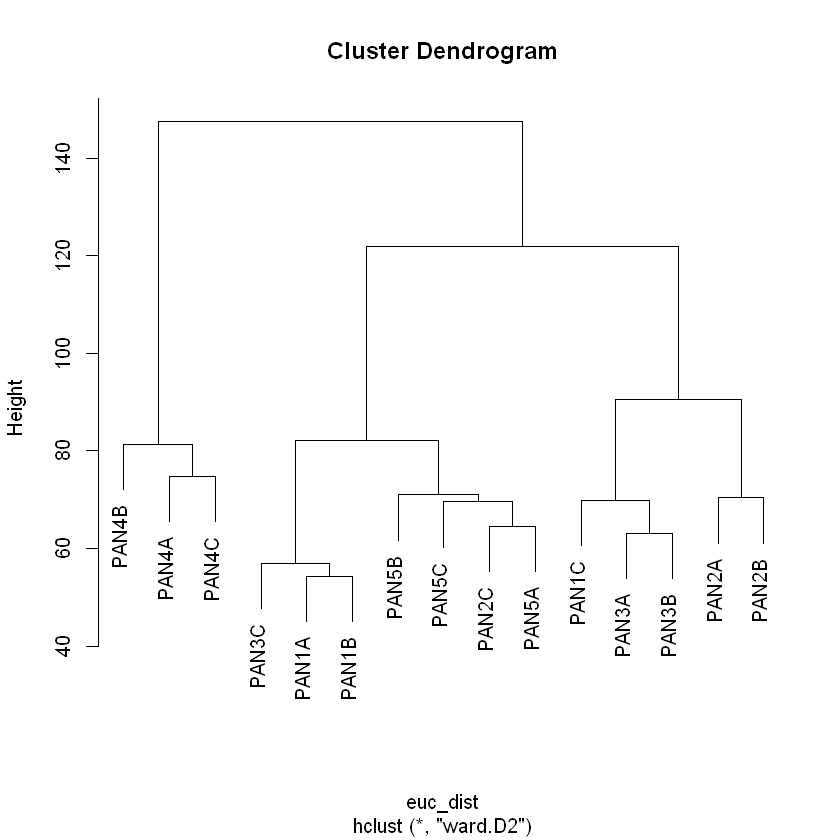

In [183]:
euc_dist <- dist(t(vst_trans_count_tab))
euc_clust <- hclust(euc_dist, method="ward.D2")
plot(euc_clust)

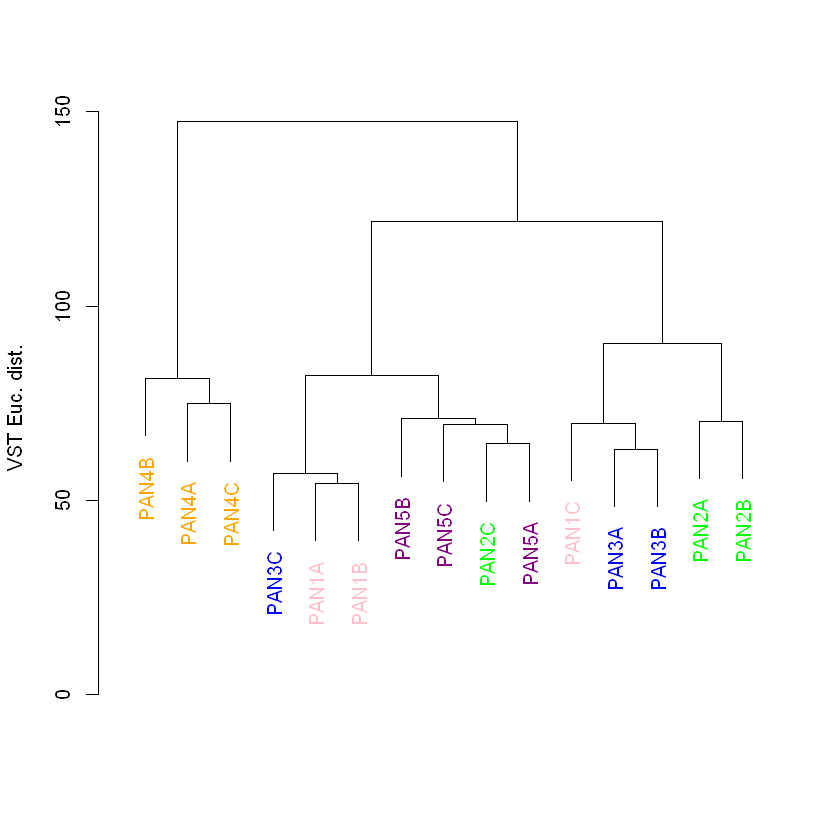

In [184]:
euc_dend <- as.dendrogram(euc_clust, hang=0.1)
dend_cols <- as.character(sample_info_tab$color[order.dendrogram(euc_dend)])
labels_colors(euc_dend) <- dend_cols
plot(euc_dend, ylab="VST Euc. dist.")

In [46]:
ggsave("dend_paper01.pdf",, device= "pdf")

Saving 6.67 x 6.67 in image



# MDS using phyloseq

In [185]:
#create a phyloseq object using a normalized deseq table
vst_count_phy <- otu_table(vst_trans_count_tab, taxa_are_rows=T)
sample_info_tab_phy <- sample_data(sample_info_tab)
vst_physeq <- phyloseq(vst_count_phy, sample_info_tab_phy)
#create a PCOA
vst_pcoa <- ordinate(vst_physeq, method="MDS", distance="euclidean")
eigen_vals <- vst_pcoa$values$Eigenvalues
write.table(vst_pcoa$vectors, "MDS.tab")
write.table(vst_pcoa$values, "MDS_values.tab")

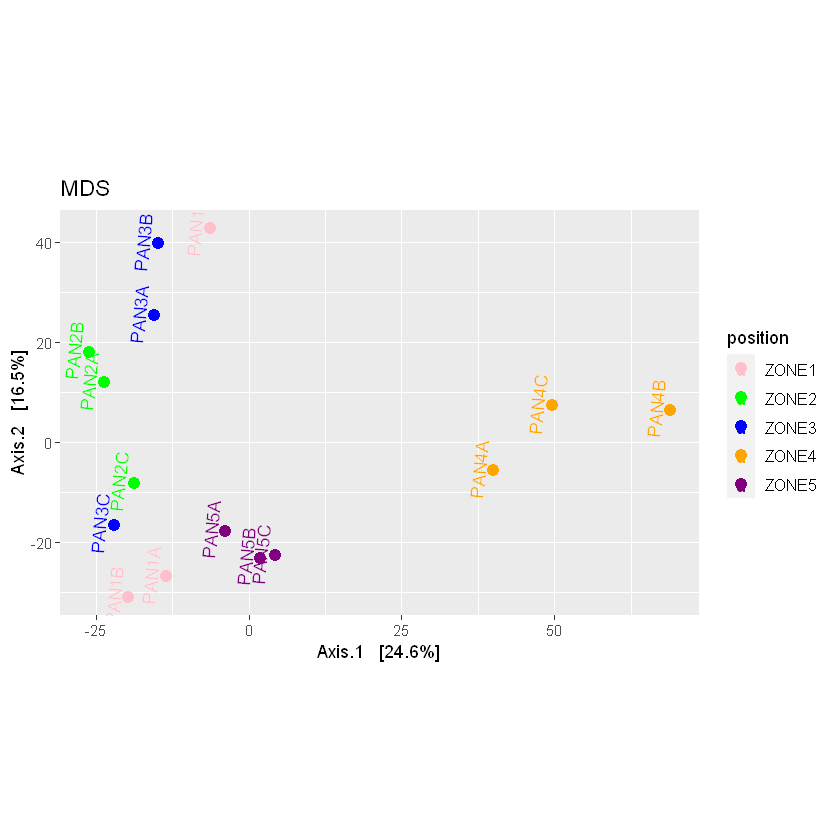

In [187]:
pco <- plot_ordination(vst_physeq, vst_pcoa, color="position") + 
  geom_point(size=3) + labs(col="position") + 
  geom_text(aes(label=rownames(sample_info_tab), hjust=+0.5, vjust=-0.6, angle = 85)) + 
  coord_fixed(sqrt(eigen_vals[2]/eigen_vals[1])) + ggtitle("MDS") + 
  scale_color_manual(values=unique(sample_info_tab$color)) + 
  theme(legend.text = element_text(size=10))
pco

In [49]:
ggsave("pco_paper1.pdf",pco, device= "pdf")

Saving 6.67 x 6.67 in image



# Diversity indices

In [188]:
#create a phyloseq object
count_tab_phy <- otu_table(count_tab, taxa_are_rows=T)
tax_tab_phy <- tax_table(tax_tab_sp)
ASV_physeq <- phyloseq(count_tab_phy, tax_tab_phy, sample_info_tab_phy)
ASV_physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 296 taxa and 15 samples ]
sample_data() Sample Data:       [ 15 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 296 taxa by 7 taxonomic ranks ]

In [189]:
index_table <-estimate_richness(ASV_physeq, measures=c("Chao1", "Shannon", "Simpson"))
index_table

Warning message in estimate_richness(ASV_physeq, measures = c("Chao1", "Shannon", :
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


,Chao1,se.chao1,Shannon,Simpson
,<dbl>,<dbl>,<dbl>,<dbl>
PAN1A,32,0,2.690910,0.9028523
PAN1B,39,0,2.944502,0.9176451
PAN1C,42,0,2.915942,0.9212609
PAN2A,16,0,1.913880,0.7628651
PAN2B,32,0,2.908280,0.9224934
PAN2C,24,0,2.126969,0.7791167
PAN3A,23,0,2.345953,0.8342378
PAN3B,29,0,2.012337,0.7212566
PAN3C,22,0,2.233758,0.8290613


In [52]:
#newSTorder = c("OLT", "PB", "NML", "SML", "MINOR")

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


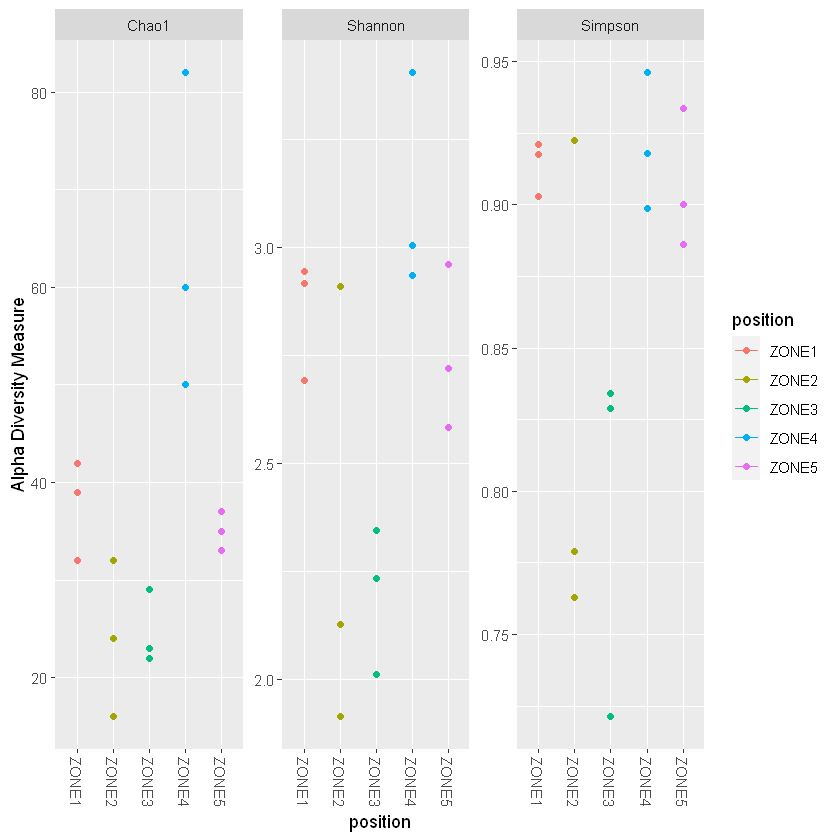

In [190]:
riqueza1 <- plot_richness(ASV_physeq,x = "position" , color="position", measures=c("Chao1", "Shannon", "Simpson"))
riqueza1$data$position <- as.character(riqueza1$data$position)
riqueza1$data$position <- factor(riqueza1$data$position)
print(riqueza1)

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


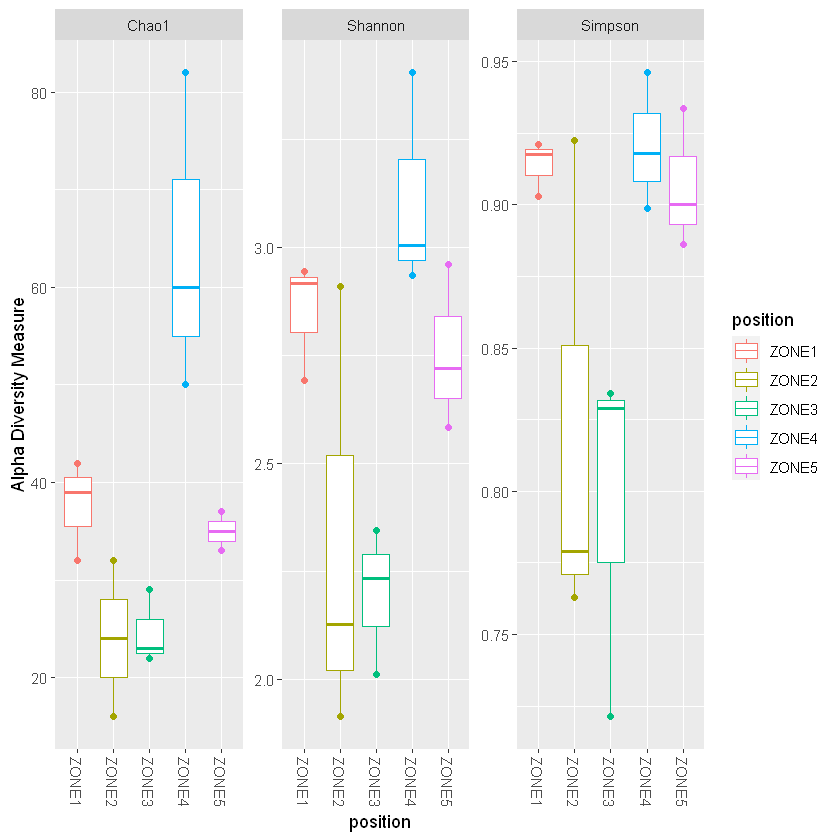

In [192]:
riqueza <- plot_richness(ASV_physeq,x = "position" , color="position", measures=c("Chao1", "Shannon", "Simpson")) + geom_boxplot()
riqueza$data$position <- as.character(riqueza$data$position)
riqueza$data$position <- factor(riqueza$data$position)
print(riqueza)

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


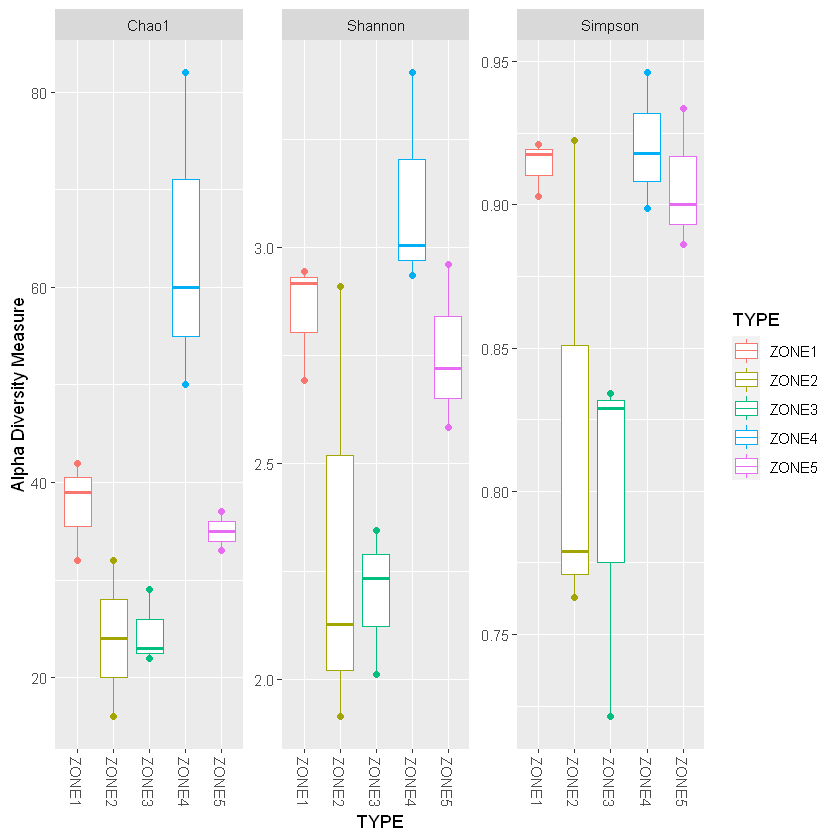

In [175]:
riqueza <- plot_richness(ASV_physeq,x = "TYPE" , color="TYPE", measures=c("Chao1", "Shannon", "Simpson")) + geom_boxplot()
riqueza$data$TYPE <- as.character(riqueza$data$TYPE)
riqueza$data$TYPE <- factor(riqueza$data$TYPE)
print(riqueza)

In [55]:
ggsave("richness_paper1.pdf",riqueza, device= "pdf")

Saving 6.67 x 6.67 in image



In [193]:
sample_info_index <- cbind(sample_info_tab_phy, index_table)
sample_info_index

,code,position,color,Chao1,se.chao1,Shannon,Simpson
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PAN1A,P1A,ZONE1,#FFC0CB,32,0,2.690910,0.9028523
PAN1B,P1B,ZONE1,#FFC0CB,39,0,2.944502,0.9176451
PAN1C,P1C,ZONE1,#FFC0CB,42,0,2.915942,0.9212609
PAN2A,P2A,ZONE2,#00FF00,16,0,1.913880,0.7628651
PAN2B,P2B,ZONE2,#00FF00,32,0,2.908280,0.9224934
PAN2C,P2C,ZONE2,#00FF00,24,0,2.126969,0.7791167
PAN3A,P3A,ZONE3,#0000FF,23,0,2.345953,0.8342378
PAN3B,P3B,ZONE3,#0000FF,29,0,2.012337,0.7212566
PAN3C,P3C,ZONE3,#0000FF,22,0,2.233758,0.8290613


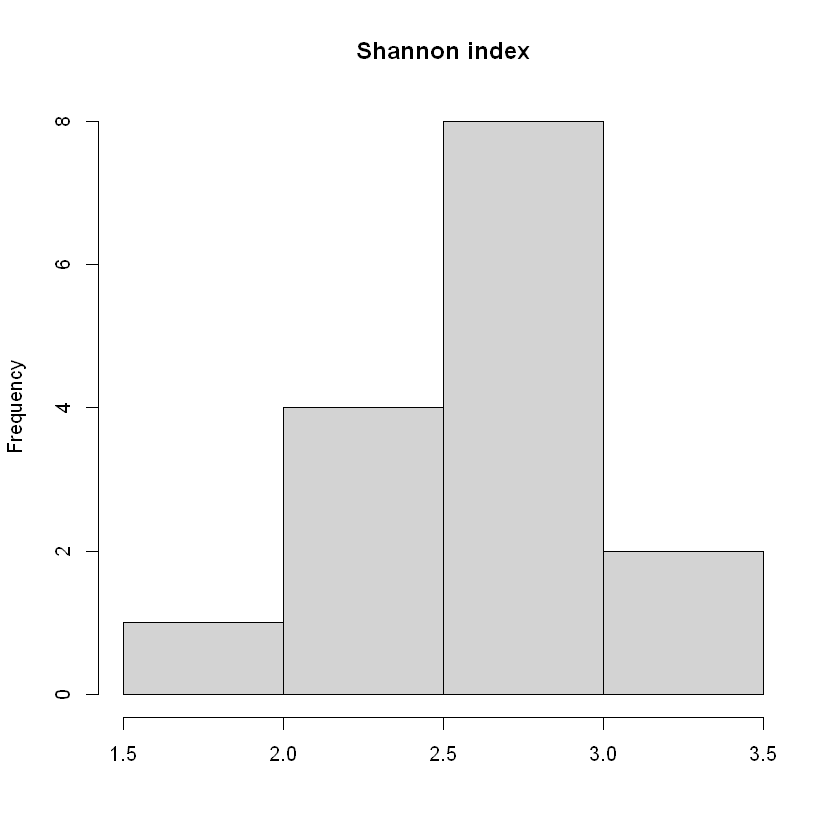

In [194]:
hist(sample_info_index$Shannon, main="Shannon index", xlab="")

In [195]:
sha_test <-  aov(Shannon ~ position, sample_info_index)
summary(sha_test)

            Df Sum Sq Mean Sq F value Pr(>F)  
position     4  1.746  0.4365   5.159 0.0162 *
Residuals   10  0.846  0.0846                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [202]:
library(agricolae)

Warning message:
"package 'agricolae' was built under R version 4.1.3"


ERROR: Error: package or namespace load failed for 'agricolae' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'htmltools' 0.5.2 is already loaded, but >= 0.5.4 is required


In [200]:
# post-hoc test
#hsd_test <- TukeyHSD(sha_test) # require the agricolae package  
hsd_res <- HSD.test(sha_test, "position", group= TRUE) 
hsd_res  

ERROR: Error in HSD.test(sha_test, "position", group = TRUE): no se pudo encontrar la función "HSD.test"


In [203]:
kruskal.test(Shannon ~ position, sample_info_index)


	Kruskal-Wallis rank sum test

data:  Shannon by position
Kruskal-Wallis chi-squared = 9.6667, df = 4, p-value = 0.04643


In [204]:
pairwise.wilcox.test(sample_info_index$Shannon, sample_info_index$position, p.adj = "BH")


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  sample_info_index$Shannon and sample_info_index$position 

      ZONE1 ZONE2 ZONE3 ZONE4
ZONE2 0.29  -     -     -    
ZONE3 0.25  1.00  -     -    
ZONE4 0.29  0.25  0.25  -    
ZONE5 1.00  0.50  0.25  0.29 

P value adjustment method: BH 

# CHECK POINT (21/05/22)

# STACKPLOT OF CLASSES

In [241]:
clases_counts_tab <- otu_table(tax_glom(ASV_physeq, taxrank="Kingdom"))
clases_tax_vec <- as.vector(tax_table(tax_glom(ASV_physeq, taxrank="Kingdom"))[,1])
rownames(clases_counts_tab) <- as.vector(clases_tax_vec)
#unclassified2_tax_counts <- colSums(count_tab) - colSums(clases_counts_tab)
#clases_and_unidentified_counts_tab <- rbind(clases_counts_tab, "Unclassified"=unclassified2_tax_counts)
#clases_taxa_counts_tab <- clases_and_unidentified_counts_tab
clases_taxa_counts_tab <- clases_counts_tab
identical(colSums(clases_taxa_counts_tab), colSums(count_tab))

[1] FALSE

In [242]:
clases_taxa_counts_tab

,PAN1A,PAN1B,PAN1C,PAN2A,PAN2B,PAN2C,PAN3A,PAN3B,PAN3C,PAN4A,PAN4B,PAN4C,PAN5A,PAN5B,PAN5C
Eubacteria,773,1237,5153,532,6240,1227,2209,1573,667,2336,3967,2200,838,1051,416
Chromista,1133,1193,4841,10252,8921,195,4350,4479,784,5272,4209,4715,570,768,903
Plantae,422,527,2616,17,3779,137,338,965,277,177,336,102,1239,459,1352
Protozoa,180,163,1137,4,0,0,241,1101,0,219,242,1112,0,9,0


In [243]:
clases_taxa_proportions_tab <- apply(clases_taxa_counts_tab, 2, function(x) x/sum(x)*100)
temp_filt_clases_taxa_proportions_tab <- data.frame(clases_taxa_proportions_tab[apply(clases_taxa_proportions_tab, 1, max) > 5, ])
filtered2_proportions <- colSums(clases_taxa_proportions_tab) - colSums(temp_filt_clases_taxa_proportions_tab) 
filt_clases_taxa_proportions_tab <- rbind(temp_filt_clases_taxa_proportions_tab, "Other"=filtered2_proportions)
clases_stack <- filt_clases_taxa_proportions_tab
clases_stack$Major_Taxa <- row.names(clases_stack)
clases_stack.g <- gather(clases_stack, Sample, Proportion, -Major_Taxa)
datos_stack<-data.frame("Sample"=row.names(sample_info_tab), "char"=sample_info_tab$position, "color"=sample_info_tab$color, stringsAsFactors=F)                                   
write.csv(clases_stack.g, "clases_stack_g.csv")
clases_stack.g2 <- merge(clases_stack.g, datos_stack)                                                                      

In [244]:
filt_clases_taxa_proportions_tab

,PAN1A,PAN1B,PAN1C,PAN2A,PAN2B,PAN2C,PAN3A,PAN3B,PAN3C,PAN4A,PAN4B,PAN4C,PAN5A,PAN5B,PAN5C
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Eubacteria,30.821372,39.647436,37.484542,4.9236465,32.94615,78.704298,30.947044,19.37669,38.59954,29.185407,45.316427,27.063599,31.65848,45.9554001,15.57469
Chromista,45.175439,38.237179,35.214956,94.8819991,47.10137,12.508018,60.941440,55.17369,45.37037,65.867066,48.080877,58.002214,21.53381,33.5811106,33.80756
Plantae,16.826156,16.891026,19.029606,0.1573346,19.95248,8.787684,4.735220,11.88716,16.03009,2.211394,3.838245,1.254767,46.80771,20.0699606,50.61775
Protozoa,7.177033,5.224359,8.270895,0.0370199,0.00000,0.000000,3.376296,13.56245,0.00000,2.736132,2.764451,13.679419,0.00000,0.3935286,0.00000
Other,0.000000,0.000000,0.000000,0.0000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0000000,0.00000


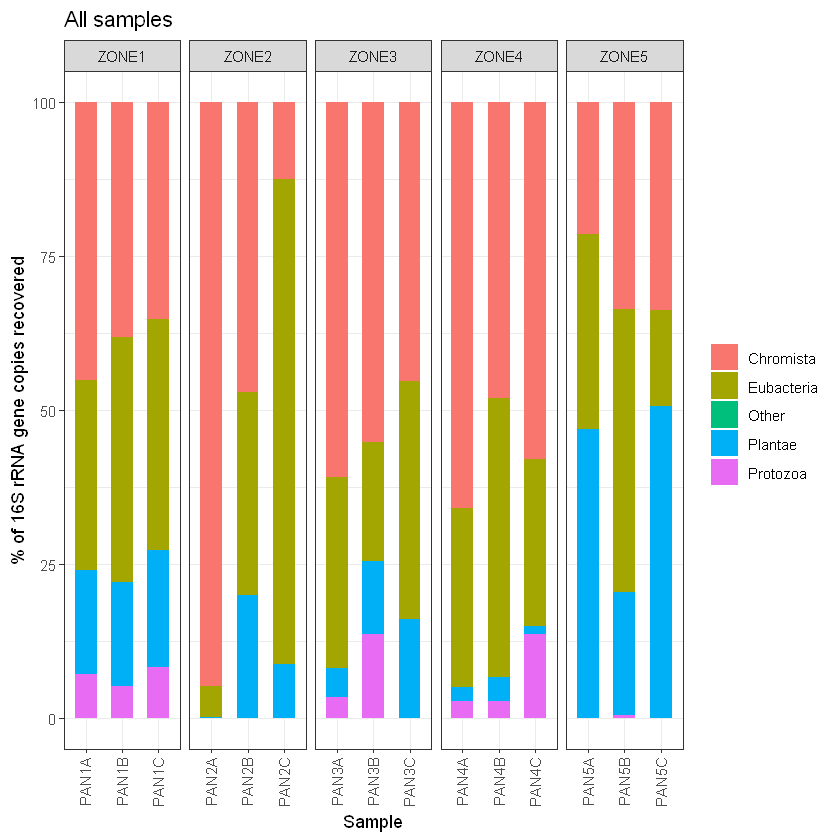

In [245]:
apilado <- ggplot(clases_stack.g2, aes(x=Sample, y=Proportion, fill=Major_Taxa)) +
  geom_bar(width=0.6, stat="identity") +
  theme_bw() +
  theme(axis.text.x=element_text(angle=90, vjust=0.4, hjust=1), legend.title=element_blank()) +
  labs(x="Sample", y="% of 16S rRNA gene copies recovered", title="All samples") +
 facet_grid(~char, scales = 'free_x', space = 'free_x')
apilado

In [235]:
ggsave("stack_plot_paper1.pdf",apilado, device= "pdf")

Saving 6.67 x 6.67 in image



# AMPVIS2

In [246]:
library(ampvis2)
library(data.table)


Attaching package: 'data.table'


The following object is masked from 'package:dendextend':

    set


The following object is masked from 'package:SummarizedExperiment':

    shift


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [247]:
otutable <- data.frame(OTU = rownames(phyloseq::otu_table(ASV_physeq)@.Data),
                       phyloseq::otu_table(ASV_physeq)@.Data,
                       phyloseq::tax_table(ASV_physeq)@.Data,
                       check.names = FALSE)
metadataX <- data.frame(phyloseq::sample_data(ASV_physeq), 
                       check.names = FALSE)
metadataX <-setDT(metadataX, keep.rownames = TRUE)[]

In [248]:
av2 <- amp_load(otutable, metadataX)
av2

ampvis2 object with 3 elements. 
Summary of OTU table:
     Samples         OTUs  Total#Reads    Min#Reads    Max#Reads Median#Reads 
          15          296       102634         1565        18945         7583 
   Avg#Reads 
     6842.27 

Assigned taxonomy:
    Kingdom      Phylum       Class       Order      Family       Genus 
   253(85%) 240(81.08%) 212(71.62%) 162(54.73%) 141(47.64%) 132(44.59%) 
    Species 
      0(0%) 

Metadata variables: 4 
 rn, code, position, color

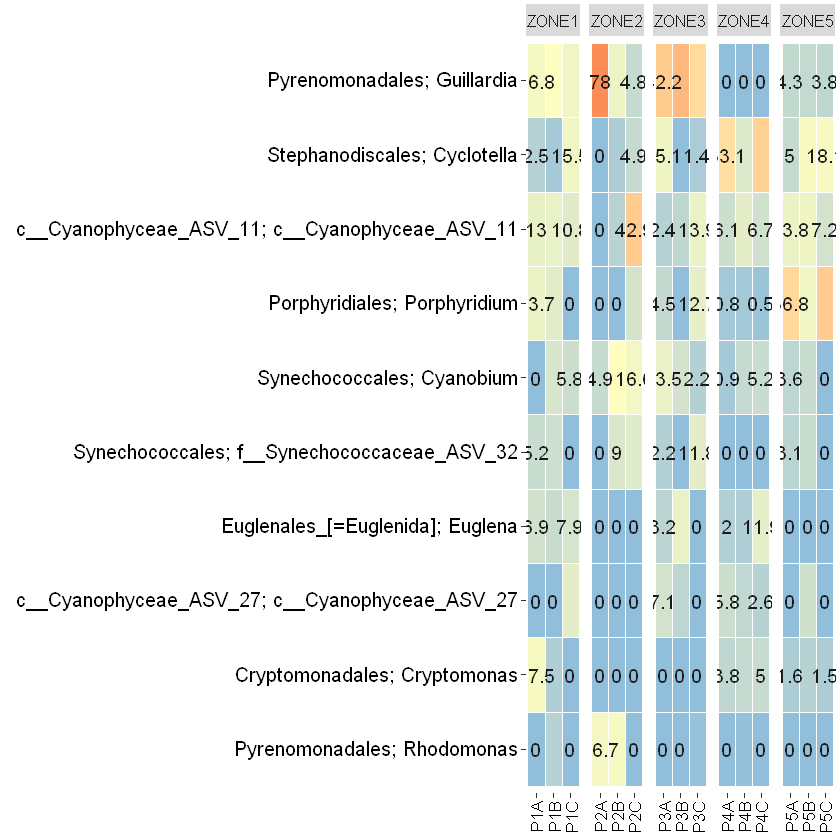

In [251]:
#By Genus
amp_heatmap(av2, 
            group_by = "code", 
            facet_by = "position", 
            plot_values = TRUE,
            tax_show = 10,
            tax_aggregate = "Genus",
            tax_add = "Order",
            #color_vector = c("white","blue", "red"),
            plot_colorscale = "sqrt",
            plot_legendbreaks = c(1, 10, 30, 60))

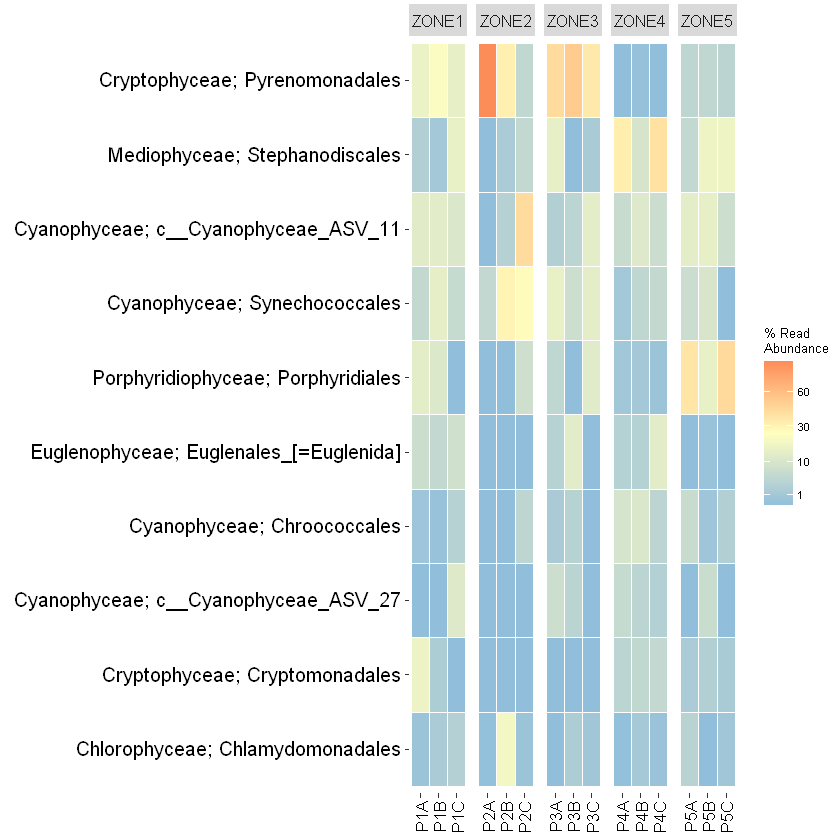

In [263]:
heatmap <- amp_heatmap(av2, 
            group_by = "code",
            facet_by = "position", 
            plot_values = FALSE,
            tax_show = 10,
            tax_aggregate = "Order",
            tax_add = "Class",
            plot_colorscale = "sqrt",
            plot_legendbreaks = c(1, 10, 30, 60))
heatmap

In [76]:
ggsave("heatmap_paper.pdf",heatmap, device= "pdf")

Saving 6.67 x 6.67 in image

